In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime

import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import files
file = files.upload()
df = pd.read_excel('Tweets uncleaned_Ver1.xlsx')

Saving Tweets uncleaned_Ver1.xlsx to Tweets uncleaned_Ver1.xlsx


In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   Sid, Arthik, Reha, Vinit      4235 non-null   object        
 5   negativereason_confidence     10522 non-null  float64       
 6   airline                       14640 non-null  object        
 7   airline_sentiment_gold        40 non-null     object        
 8   name                          14640 non-null  object        
 9   negativereason_gold           32 non-null     object        
 10  retweet_count                 14640 non-null  int64         
 11  text                        

In [ ]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada)
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada)
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada)
5,570300767074180992,negative,1.0000,Can't Tell,negative,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada)
6,570300616901320000,positive,0.6745,NaN,negative,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this â€œear wormâ€_x009d_ wonâ€™t go away :)",NaN,2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada)
7,570300248553348992,neutral,0.6340,NaN,neutral,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada)
8,570299953286942016,positive,0.6559,NaN,negative,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada)
9,570295459631262976,positive,1.0000,NaN,positive,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada)


In [ ]:
from numpy.lib.type_check import nan_to_num
from numpy.core.numeric import NaN
num_of_nan_missing=df.isnull().sum()
print(num_of_nan_missing)

tweet_id                        0    
airline_sentiment               0    
airline_sentiment_confidence    0    
negativereason                  5462 
Sid, Arthik, Reha, Vinit        10405
negativereason_confidence       4118 
airline                         0    
airline_sentiment_gold          14600
name                            0    
negativereason_gold             14608
retweet_count                   0    
text                            0    
tweet_coord                     13621
tweet_created                   0    
tweet_location                  4733 
user_timezone                   4820 
dtype: int64


In [ ]:
df['first_word'] = df['text'].str.split(' ', 1).str[0]
df.loc[~df['first_word'].str.startswith('@'), 'first_word'] = np.nan
df['remaining_sentence'] = df['text'].str.split(' ', 1).str[1]

In [ ]:
print(df['first_word'])

0        @VirginAmerica
1        @VirginAmerica
2        @VirginAmerica
3        @VirginAmerica
4        @VirginAmerica
              ...      
14635    @AmericanAir  
14636    @AmericanAir  
14637    @AmericanAir  
14638    @AmericanAir  
14639    @AmericanAir  
Name: first_word, Length: 14640, dtype: object


In [ ]:
unique_values = df['first_word'].unique()
print(unique_values)

['@VirginAmerica' '@virginamerica' nan '@VirginAmerica,' '@virginAmerica'
 '@VirginAmerica\nwjere' '@virginamerica..' '@united' '@United' '@united.'
 '@United.' '@lindaSWC' '@united:' '@SouthwestAir' '@united,'
 '@united\nYou' '@united-rebooked' '@Unitedâ€‹' '@united--excited'
 '@united...do' '@united...lies' "@united's" '@United,' '@United:'
 '@SouthwestAir:' '@SouthwestAir-' '@southwestair' '@SouthwestAir,'
 '@southwestair,' '@SouthwestAir.' '@southwestAir' '@SouthwestAir#4569'
 "@SouthwestAir's" '@SouthwestAir...' '@Southwestair'
 '@SouthwestAir...give' '@southwestair.' '@southwestair#SWADiversity'
 '@HillAConlin' '@JetBlue' '@jetblue' '@CatfoodBeerGlue' '@eatgregeat'
 '@JetBlue,' '@JetBlue?' "@JetBlue's" '@JetBlue:' '@JetBlue.'
 '@shannonwoodward' '@Jetblue' '@jetblue,' '@NinaDavuluri' '@USAirways'
 '@USAirways:' '@usairways' '@USAirways.' '@USAirways,' '@USairways'
 '@Sb5551' '@UsAirways' '@USAirways-' '@timbennettg3' '@nrhodes85:'
 '@sarahpompei' '@AndrewFallis' '@nrhodes85' '@Us

In [ ]:
import nltk
nltk.download('punkt')

# Assuming 'df' is your DataFrame and 'text_column' is the column containing the tweets
tweets = df['remaining_sentence']

# Convert text to lowercase
tweets = tweets.str.lower()

# Remove URLs
tweets = tweets.apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x))

# Remove special characters and punctuation
tweets = tweets.apply(lambda x: re.sub(r"[^\w\s]", "", x))

# Remove digits
tweets = tweets.apply(lambda x: re.sub(r"\d+", "", x))

# Tokenize the tweets
tweets = tweets.apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words("english"))
tweets = tweets.apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
tweets = tweets.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into sentences
tweets = tweets.apply(lambda x: ' '.join(x))

# Update the DataFrame with the cleaned tweets
df['cleaned_tweets'] = tweets


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(df['cleaned_tweets'])

0        dhepburn said                                                                                       
1        plus youve added commercial experience tacky                                                        
2        didnt today must mean need take another trip                                                        
3        really aggressive blast obnoxious entertainment guest face amp little recourse                      
4        really big bad thing                                                                                
                 ...                                                                                         
14635    thank got different flight chicago                                                                  
14636    leaving minute late flight warning communication minute late flight thats called shitty customer svc
14637    please bring american airline blackberry                                                            
14638    m

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming 'df' is your DataFrame and 'cleaned_tweets' is the column containing the cleaned tweets
cleaned_tweets = df['cleaned_tweets']

# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each cleaned tweet
sentiment_scores = cleaned_tweets.apply(lambda x: sid.polarity_scores(x))

# Extract the compound score from the sentiment scores
compound_scores = sentiment_scores.apply(lambda x: x['compound'])

# Add the sentiment scores as a new column in the DataFrame
df['sentiment_score'] = compound_scores

In [ ]:
print(df['sentiment_score'])

0        0.0000
1        0.0000
2        0.0000
3       -0.3306
4       -0.5829
          ...  
14635    0.3612
14636   -0.7184
14637    0.3182
14638    0.3818
14639    0.0772
Name: sentiment_score, Length: 14640, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   Sid, Arthik, Reha, Vinit      4235 non-null   object        
 5   negativereason_confidence     10522 non-null  float64       
 6   airline                       14640 non-null  object        
 7   airline_sentiment_gold        40 non-null     object        
 8   name                          14640 non-null  object        
 9   negativereason_gold           32 non-null     object        
 10  retweet_count                 14640 non-null  int64         
 11  text                        

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,first_word,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),@VirginAmerica,What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),@VirginAmerica,plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),@VirginAmerica,I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),@VirginAmerica,and it's a really big bad thing about it,really big bad thing,-0.5829


In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.drop(columns=['first_word','text','airline_sentiment_gold','negativereason_gold'], inplace=True)

In [ ]:
df_cleaned.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829
5,570300767074180992,negative,1.0000,Can't Tell,negative,0.6842,Virgin America,jnardino,0,NaN,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada),seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay flight seat didnt playing really bad thing flying va,0.0963
6,570300616901320000,positive,0.6745,NaN,negative,0.0000,Virgin America,cjmcginnis,0,NaN,2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada),"yes, nearly every time I fly VX this â€œear wormâ€_x009d_ wonâ€™t go away :)",yes nearly every time fly vx âœear wormâ_xd_ wonât go away,0.4019
7,570300248553348992,neutral,0.6340,NaN,neutral,NaN,Virgin America,pilot,0,NaN,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada),"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",really missed prime opportunity men without hat parody,0.1458
8,570299953286942016,positive,0.6559,NaN,negative,NaN,Virgin America,dhepburn,0,NaN,2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada),"Well, I didn'tâ€¦but NOW I DO! :-D",well didntâbut,0.2732
9,570295459631262976,positive,1.0000,NaN,positive,NaN,Virgin America,YupitsTate,0,NaN,2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada),"it was amazing, and arrived an hour early. You're too good to me.",amazing arrived hour early youre good,0.7717


In [ ]:
df_cleaned.to_excel("df_clean_ver1.xlsx")

In [ ]:
df_cleaned.info()

df_cleaned['airline_sentiment']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   Sid, Arthik, Reha, Vinit      4235 non-null   object        
 5   negativereason_confidence     10522 non-null  float64       
 6   airline                       14640 non-null  object        
 7   name                          14640 non-null  object        
 8   retweet_count                 14640 non-null  int64         
 9   tweet_coord                   1019 non-null   object        
 10  tweet_created                 14640 non-null  datetime64[ns]
 11  tweet_location              

0        neutral 
1        positive
2        neutral 
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637    neutral 
14638    negative
14639    neutral 
Name: airline_sentiment, Length: 14640, dtype: object

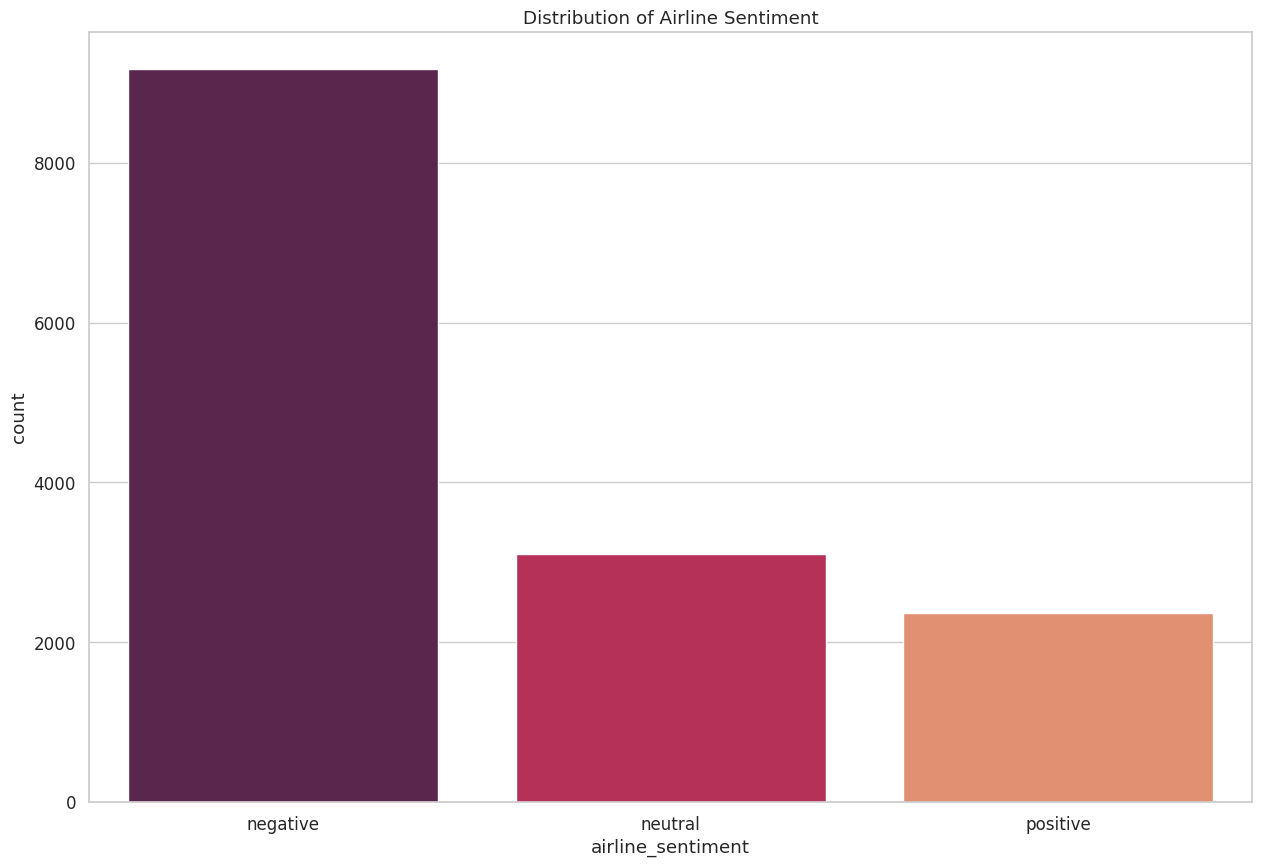

In [ ]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.countplot(x=df_cleaned['airline_sentiment'], palette='rocket',
              order=df_cleaned['airline_sentiment'].value_counts().index,
              data=df_cleaned, ax=axes)
axes.set_title("Distribution of Airline Sentiment")
plt.show()

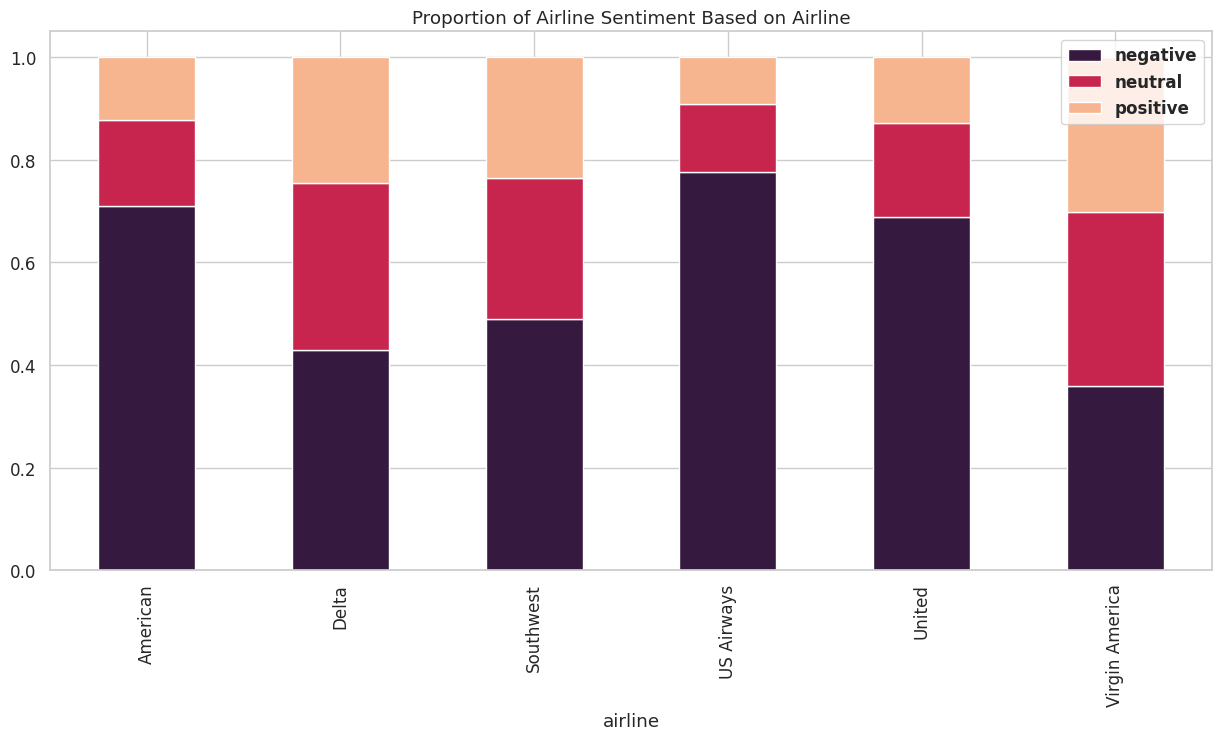

In [ ]:
import matplotlib.colors as mc

plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 15})
colors = sns.color_palette('rocket')[0:20]
cmap = mc.LinearSegmentedColormap.from_list("", colors)

df_cleaned.groupby('airline')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap=cmap)
plt.title("Proportion of Airline Sentiment Based on Airline")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

In [ ]:
df_cleaned

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score,word_count
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000,13
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000,44
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000,44
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306,78
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,positive,0.3487,NaN,NaN,0.0000,American,KristenReenders,0,NaN,2015-02-22 12:01:01,NaN,NaN,thank you we got on a different flight to Chic...,thank got different flight chicago,0.3612,34
14636,569587371693355008,negative,1.0000,Customer Service Issue,NaN,1.0000,American,itsropes,0,NaN,2015-02-22 11:59:46,Texas,NaN,leaving over 20 minutes Late Flight. No warnin...,leaving minute late flight warning communicati...,-0.7184,100
14637,569587242672398016,neutral,1.0000,NaN,NaN,NaN,American,sanyabun,0,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182,40
14638,569587188687633984,negative,1.0000,Customer Service Issue,NaN,0.6659,American,SraJackson,0,NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"you have my money, you change my flight, and d...",money change flight dont answer phone suggesti...,0.3818,64


Text(0.5, 1.0, 'Negative Reason for Negative Sentiment')

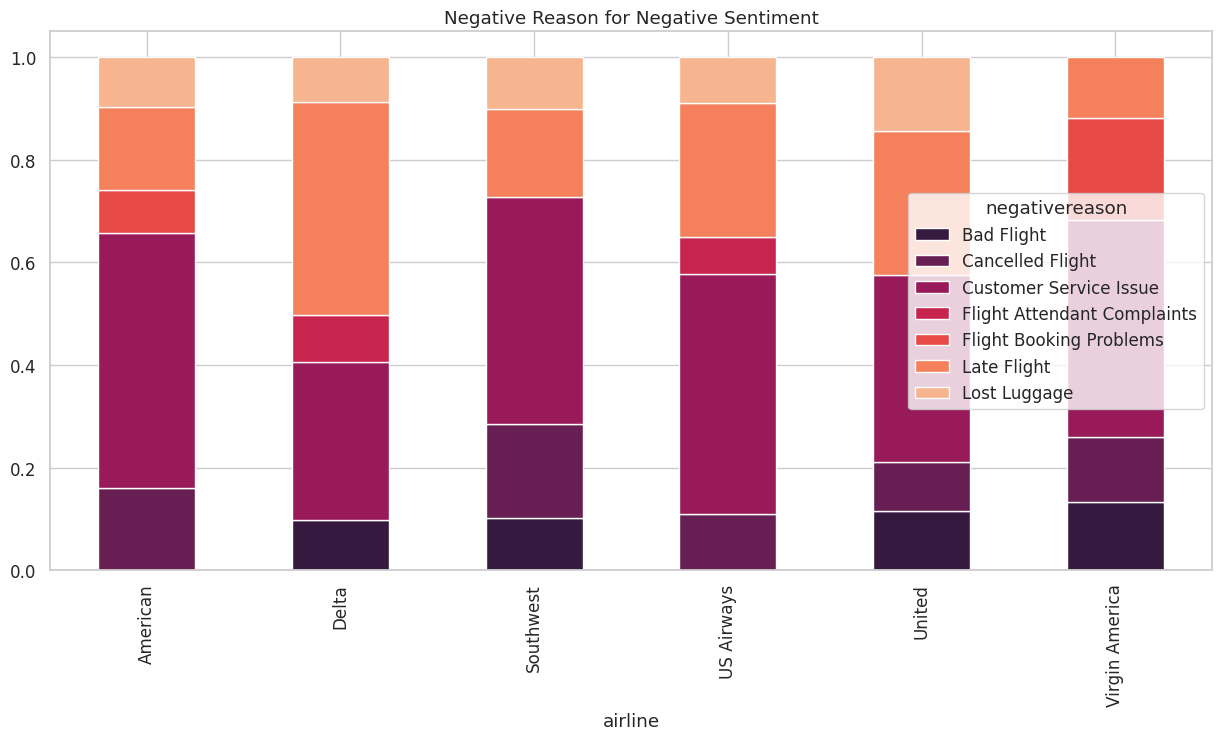

In [ ]:
df = df_cleaned[df_cleaned["negativereason"] != "Can't Tell"]
df = df[["airline", "negativereason"]]
df = df.dropna(how='any')

df = df.groupby('airline')["negativereason"].value_counts().rename('count').reset_index()
df = df.groupby('airline').head()


df["percentage"] = df["count"] / df.groupby(["airline"])["count"].transform('sum')

df.pivot_table(index = 'airline', columns = 'negativereason' , values = 'percentage').plot(
    kind = 'bar', stacked = True, cmap=cmap)

plt.title("Negative Reason for Negative Sentiment")

In [ ]:
df_cleaned

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,positive,0.3487,NaN,NaN,0.0000,American,KristenReenders,0,NaN,2015-02-22 12:01:01,NaN,NaN,thank you we got on a different flight to Chic...,thank got different flight chicago,0.3612
14636,569587371693355008,negative,1.0000,Customer Service Issue,NaN,1.0000,American,itsropes,0,NaN,2015-02-22 11:59:46,Texas,NaN,leaving over 20 minutes Late Flight. No warnin...,leaving minute late flight warning communicati...,-0.7184
14637,569587242672398016,neutral,1.0000,NaN,NaN,NaN,American,sanyabun,0,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182
14638,569587188687633984,negative,1.0000,Customer Service Issue,NaN,0.6659,American,SraJackson,0,NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"you have my money, you change my flight, and d...",money change flight dont answer phone suggesti...,0.3818


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def bad_good_words(airline, min_df):

    df = df_cleaned.copy()

    df = df[df['airline']==airline]


    df["remaining_sentence"] = df["remaining_sentence"].astype(str)
    df = df[df["airline_sentiment"] != "neutral"]

    cv = CountVectorizer(min_df=min_df, max_df=0.70)
    X = cv.fit_transform(df.remaining_sentence)
    y = df['airline_sentiment']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
    lr = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)


    words = np.array(cv.get_feature_names_out())

    X = np.eye(X_test.shape[1])
    probs = lr.predict_log_proba(X)[:, 0]
    ind = np.argsort(probs)

    good_words = words[ind[:10]]
    bad_words = words[ind[-10:]]

    good_prob = probs[ind[:10]]
    bad_prob = probs[ind[-10:]]

    df_good = pd.DataFrame(columns = ["good_word", "good_prob"])
    df_bad = pd.DataFrame(columns = ["bad_word", "bad_prob"])

    for w, p in zip(good_words, good_prob):
        df_good = df_good.append({"good_word": w, "good_prob": "{:.3f}".format(1 - np.exp(p))}, ignore_index=True)

    for w,p  in zip(bad_words, bad_prob):
        df_bad = df_bad.append({"bad_word": w, "bad_prob": "{:.3f}".format(1 - np.exp(p))}, ignore_index=True)

    df_good["good_prob"] = pd.to_numeric(df_good["good_prob"])
    df_bad["bad_prob"] = pd.to_numeric(df_bad["bad_prob"])
    df_bad["bad_prob"] = df_bad["bad_prob"].apply(lambda x: (1-x))
    print(df_bad.sort_values("bad_prob", ascending=False))
    print(df_good.sort_values("good_prob", ascending=False))

    fig, axes = plt.subplots(figsize=(15, 5))

    sns.barplot(x="bad_word", y="bad_prob", data=df_bad, palette="rocket",
                     order = df_bad.sort_values("bad_prob", ascending=False).bad_word).set(
                    title="Probability of Negative Words", xlabel ='Words', ylabel ='Probability')
    axes.set_ylim(0, 1.0)

     bad_word  bad_prob
9       worst     0.929
8         not     0.899
7       hours     0.897
6          no     0.895
5        hour     0.891
4     nothing     0.888
2        want     0.880
3        need     0.880
1         why     0.878
0  experience     0.877
    good_word  good_prob
0       thank      0.910
1      thanks      0.863
2     amazing      0.742
3       great      0.733
4        best      0.711
5        good      0.682
6       pilot      0.627
7         got      0.620
8     helpful      0.617
9  appreciate      0.614


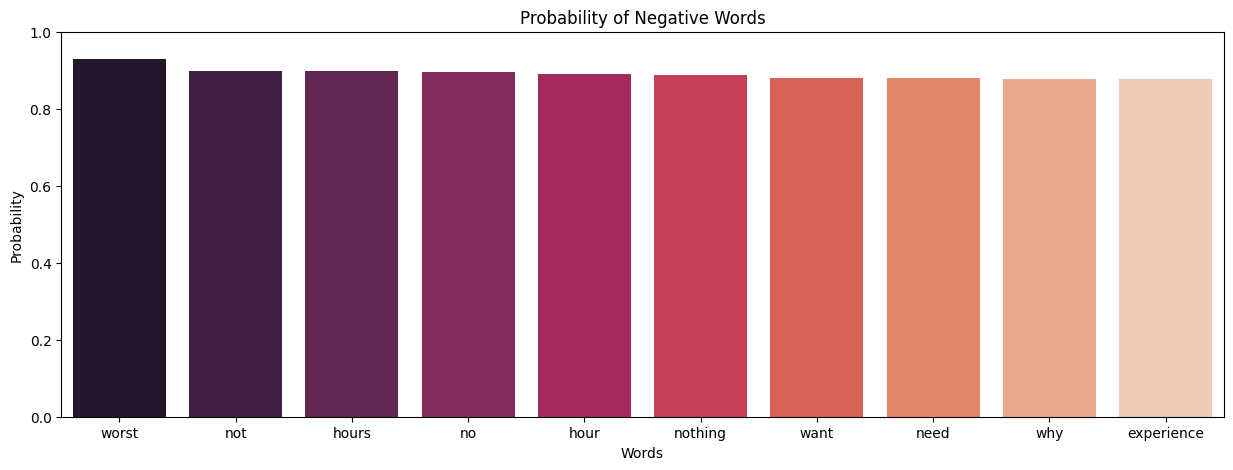

In [ ]:
bad_good_words("United", 25)

In [ ]:
def getWordContext(wordList, airline):

    weirdDF =  pd.read_excel('Tweets uncleaned_Ver1.xlsx')
    pd.set_option("display.max_colwidth", -1)
    weirdDF = weirdDF[weirdDF["airline_sentiment"] != "neutral"]
    weirdDF = weirdDF[weirdDF["airline"] == airline]

    query = '|'.join(wordList)

    weirdDF['query_match'] = weirdDF["text"].str.contains(query, case=False)
    weirdDF['word'] = weirdDF["text"].str.extract( '({})'.format(query) )

    releventTweets = weirdDF[weirdDF["query_match"] == True]

    return releventTweets.head(10)

In [ ]:
weirdWords = ["nothing"]
getWordContext(weirdWords, "United")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,query_match,word
715,570143097809707008,negative,1.0000,Lost Luggage,negative,1.0000,United,NaN,8629Fissile,NaN,0,@united Could you update me on the suitcase please? The online and phone tracking told me nothing. I was told I'd have it back yesterday!,NaN,2015-02-24 00:48:01,NaN,London,True,nothing
744,570105441688158016,negative,0.6492,Lost Luggage,negative,0.6492,United,NaN,kevinforgoogle,NaN,0,@united But they are not... lady one phone says its in tel aviv. Tel Aviv united says its in Newark. No one knows and I have nothing...,NaN,2015-02-23 22:18:24,"San Francisco, CA",NaN,True,nothing
747,570104743747416000,negative,0.6667,Customer Service Issue,negative,0.3542,United,NaN,Meyer47,NaN,0,@united what is that going to do for you? Nothing just like you always do,NaN,2015-02-23 22:15:37,Iowa,NaN,True,NaN
844,570054574389788032,negative,1.0000,Customer Service Issue,negative,1.0000,United,NaN,rholbrook,NaN,0,@united Calls to 800# resulted in 2hrs of hold time &amp; 2day wait to check suspect code share fare. Nothing investigatedâ€”my time wasted (2/2),NaN,2015-02-23 18:56:16,"Brooklyn, NY",Eastern Time (US & Canada),True,NaN
929,570005000643955968,negative,1.0000,Lost Luggage,negative,1.0000,United,NaN,mattscottcrum,NaN,0,@united or @flysaa has lost my baggageâ€¦ heard different things from different employees of @united. @flysaa has said nothing.,NaN,2015-02-23 15:39:16,"Nashville, TN",Mountain Time (US & Canada),True,nothing
1113,569922853266694016,negative,1.0000,Can't Tell,NaN,0.6540,United,NaN,2cJustice4all,NaN,0,@united @JMS2802 : nothing like supporting your own mechanics and maintenance workers...instead United puts out a video of TIMCO doing wifi.,NaN,2015-02-23 10:12:51,Chicago Illinois Crime.Inc,Central Time (US & Canada),True,nothing
1157,569911515106582016,negative,1.0000,Late Flight,NaN,1.0000,United,NaN,chefpaulcia,NaN,0,@united 1.75 hour delay. Nothing says sorry like a voucher. Missing time with family. #family #precioustime,NaN,2015-02-23 09:27:48,NaN,Central Time (US & Canada),True,NaN
1459,569710365770182016,negative,0.6571,Can't Tell,NaN,0.3429,United,NaN,ssapol5722,NaN,0,@united is there nothing you can do for me? No compensation at all? Given the circumstances I feel like there must be something you can do,NaN,2015-02-22 20:08:30,New Jersey,Quito,True,nothing
1484,569702566126324992,negative,1.0000,Customer Service Issue,NaN,0.6856,United,NaN,raisas91,NaN,0,@united i did but i got nothing from it. Just dissapointment =(,NaN,2015-02-22 19:37:30,NaN,NaN,True,nothing
1523,569683647990598976,negative,1.0000,Customer Service Issue,NaN,1.0000,United,NaN,almaaa08,NaN,0,@united I'm really glad I just waited on the phone for over an hour to be sent to a voicemail. Your customer service sucks. Nothing has been,NaN,2015-02-22 18:22:20,NaN,Eastern Time (US & Canada),True,NaN


In [ ]:
df_cleaned["airline_sentiment"]

0        neutral 
1        positive
2        neutral 
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637    neutral 
14638    negative
14639    neutral 
Name: airline_sentiment, Length: 14640, dtype: object

In [ ]:
df_cleaned

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,positive,0.3487,NaN,NaN,0.0000,American,KristenReenders,0,NaN,2015-02-22 12:01:01,NaN,NaN,thank you we got on a different flight to Chicago.,thank got different flight chicago,0.3612
14636,569587371693355008,negative,1.0000,Customer Service Issue,NaN,1.0000,American,itsropes,0,NaN,2015-02-22 11:59:46,Texas,NaN,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc,-0.7184
14637,569587242672398016,neutral,1.0000,NaN,NaN,NaN,American,sanyabun,0,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182
14638,569587188687633984,negative,1.0000,Customer Service Issue,NaN,0.6659,American,SraJackson,0,NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment,0.3818


  bad_word  bad_prob
9  over     0.936   
8  days     0.934   
7  hours    0.923   
6  bag      0.910   
5  when     0.908   
4  need     0.906   
3  because  0.905   
2  try      0.904   
1  about    0.900   
0  hrs      0.898   
  good_word  good_prob
0  thank     0.945    
1  thanks    0.840    
2  love      0.752    
3  great     0.629    
4  good      0.619    
5  nice      0.595    
6  new       0.572    
7  well      0.502    
8  morning   0.501    
9  very      0.477    


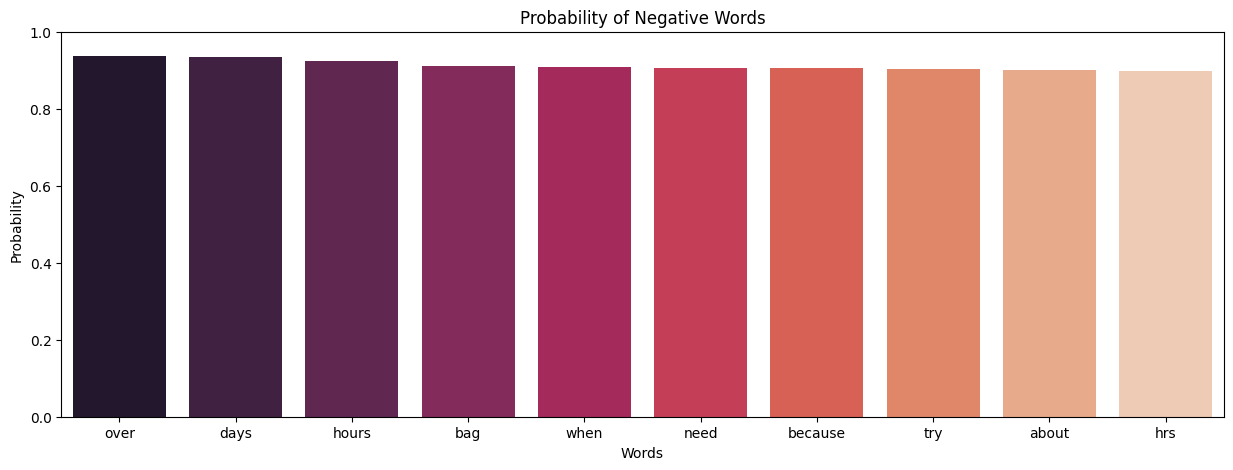

In [ ]:
bad_good_words("American", 25)

    bad_word  bad_prob
9  cancelled  0.822   
8  delayed    0.797   
7  hours      0.772   
6  still      0.765   
5  no         0.757   
4  someone    0.742   
3  late       0.737   
2  delay      0.733   
1  bag        0.681   
0  why        0.677   
  good_word  good_prob
0  thanks    0.950    
1  great     0.904    
2  thank     0.894    
3  love      0.887    
4  awesome   0.880    
5  best      0.849    
6  know      0.835    
7  _x009d_   0.773    
8  next      0.770    
9  much      0.755    


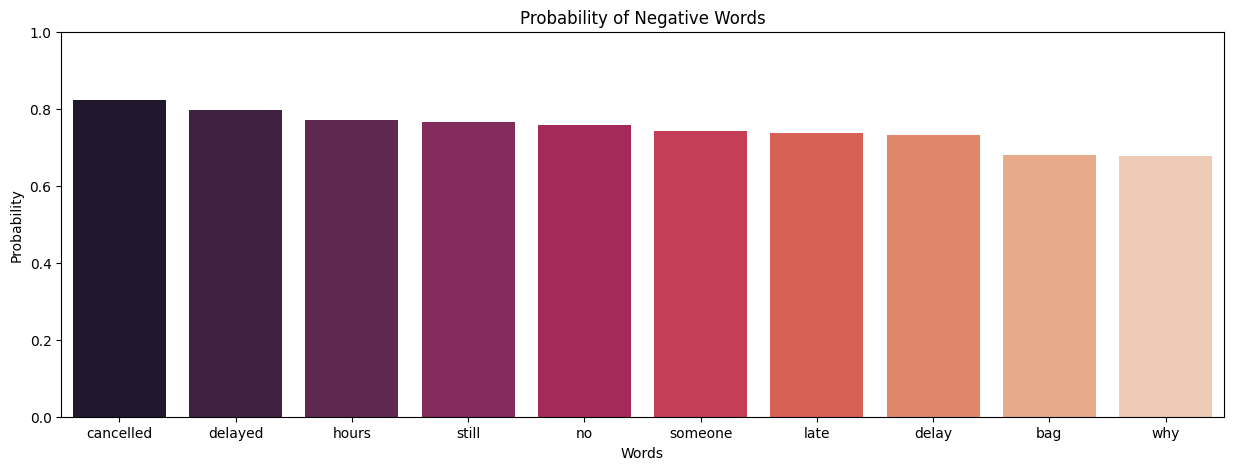

In [ ]:
bad_good_words("Delta", min_df=20)

    bad_word  bad_prob
9  worst      0.804   
8  luggage    0.775   
7  not        0.771   
6  someone    0.765   
5  hold       0.752   
4  cancelled  0.741   
3  but        0.724   
2  bag        0.720   
1  hours      0.703   
0  baggage    0.700   
    good_word  good_prob
0  thank       0.953    
1  crew        0.944    
2  awesome     0.936    
3  thanks      0.934    
4  best        0.910    
5  love        0.897    
6  great       0.867    
7  much        0.865    
8  appreciate  0.853    
9  see         0.815    


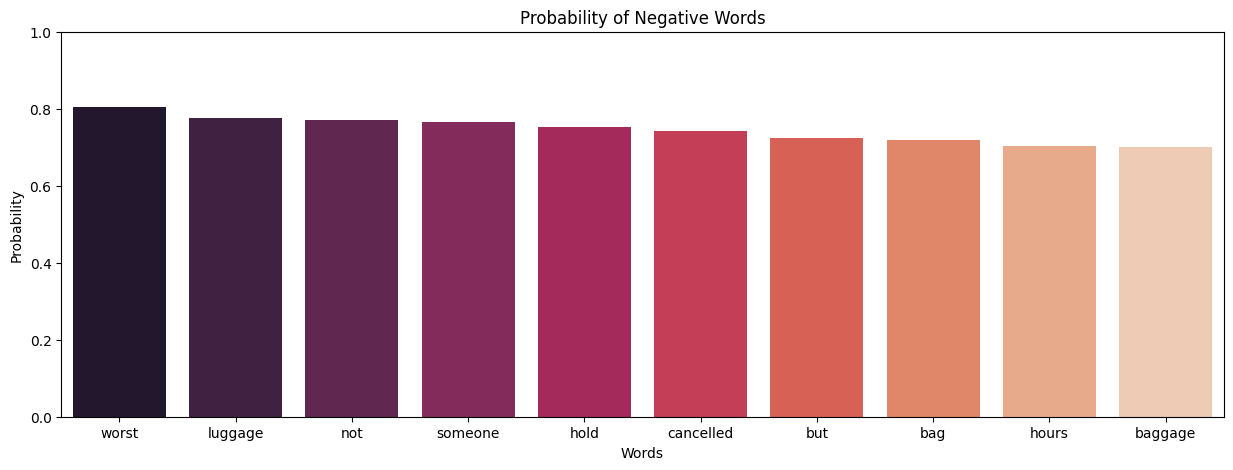

In [ ]:
bad_good_words("Southwest", 25)

  bad_word  bad_prob
9  hold     0.931   
8  not      0.924   
7  again    0.914   
6  call     0.913   
5  what     0.911   
4  hours    0.903   
3  nothing  0.900   
2  worst    0.895   
1  delays   0.891   
0  website  0.887   
  good_word  good_prob
0  thank     0.851    
1  thanks    0.803    
2  great     0.630    
3  awesome   0.608    
4  kudos     0.578    
5  best      0.571    
6  made      0.570    
7  helpful   0.570    
8  thx       0.546    
9  name      0.514    


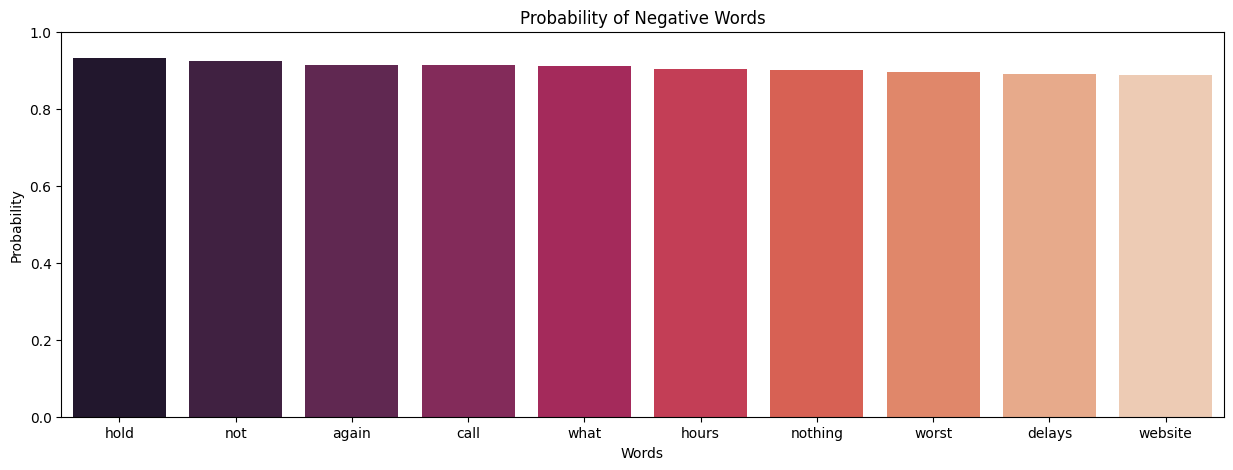

In [ ]:
bad_good_words("US Airways", 5)

    bad_word  bad_prob
9    website     0.694
8         no     0.666
7    delayed     0.601
6       help     0.587
5  cancelled     0.581
4      check     0.559
3       call     0.542
2       seat     0.531
1        why     0.516
0       site     0.505
       good_word  good_prob
0           love      0.934
1           cool      0.897
2         thanks      0.893
3          great      0.871
4  virginamerica      0.841
5          thank      0.824
6           best      0.820
7        amazing      0.810
8             we      0.803
9            fly      0.801


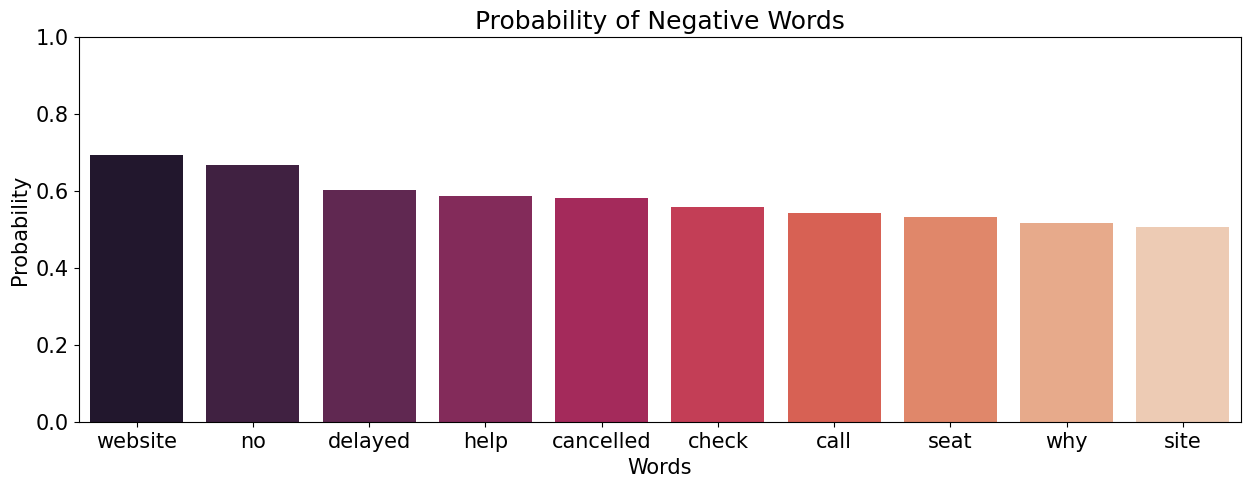

In [ ]:
bad_good_words("Virgin America", 7)

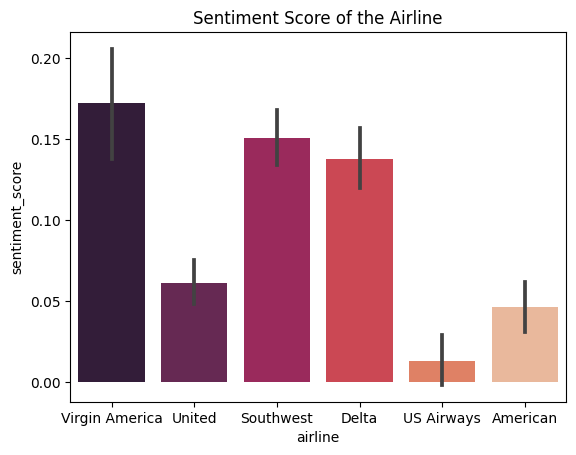

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=df_cleaned, x="airline", y="sentiment_score",palette="rocket")
ax.set_title("Sentiment Score of the Airline")
plt.show()

In [ ]:
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)

    labels = t_df.value_counts().index.values
    sizes =  Lst
    colors = sns.color_palette('rocket')[0:10]

    plt.pie(sizes, labels=['United','US Airways','American','Southwest','Delta','Virgin America'], autopct='%1.2f%%', shadow=True, startangle=90,colors=colors, textprops={'color':"w"})
    plt.title("Proportion of Airline Tweets")
    plt.legend()
    plt.show()


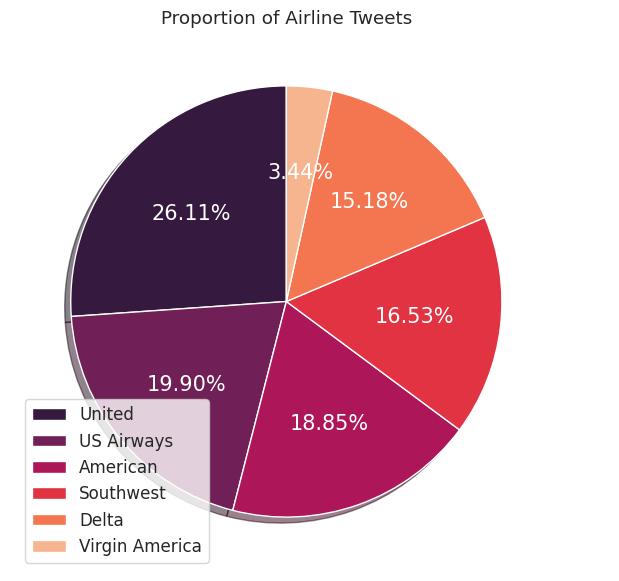

In [ ]:
createPieChartFor(df_cleaned.airline)

Text(0.5, 0, 'Airline')

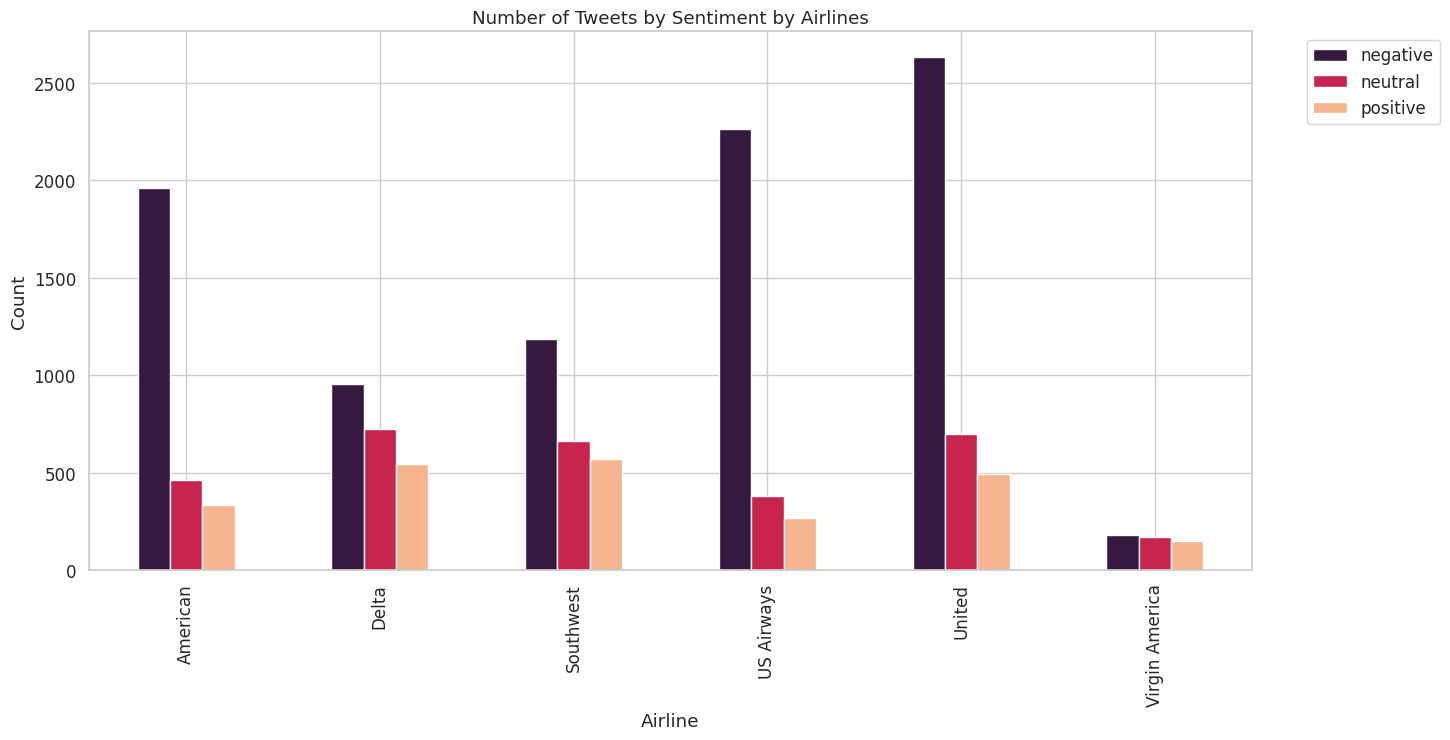

In [ ]:
airline_sentiment_df = df_cleaned.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment_df.plot(kind='bar',cmap=cmap)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Number of Tweets by Sentiment by Airlines')
plt.ylabel("Count")
plt.xlabel("Airline")

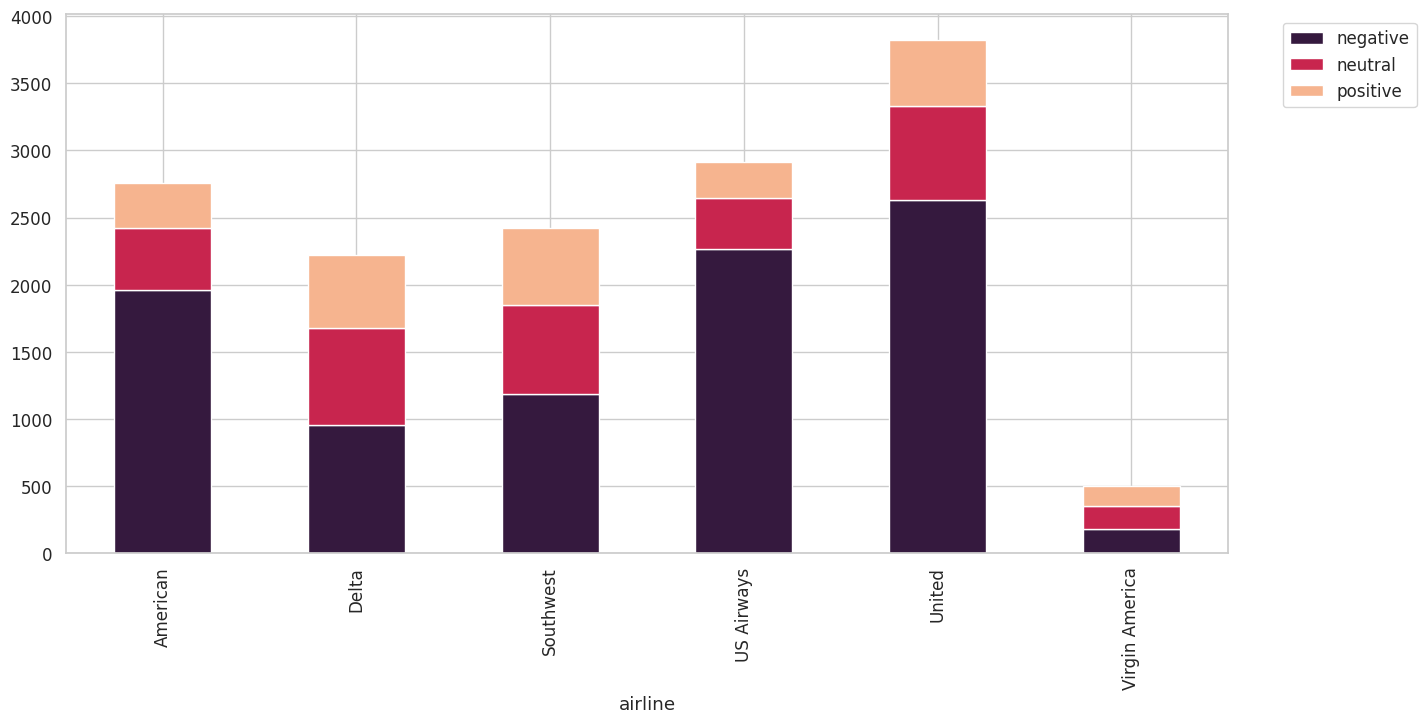

In [ ]:
airline_sentiment_df.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

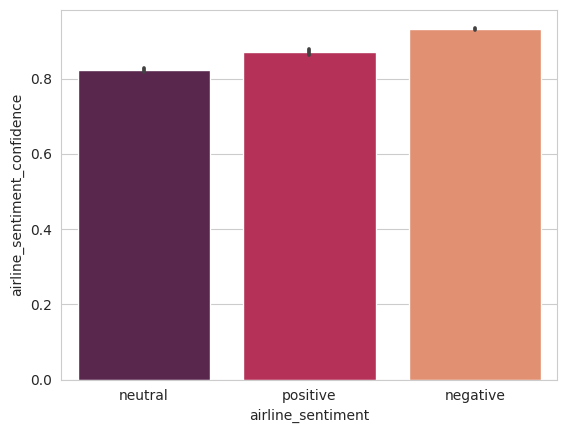

In [ ]:
sns.set_style("whitegrid")
ax = sns.barplot(x="airline_sentiment", y="airline_sentiment_confidence", data=df_cleaned, palette = 'rocket')

<Axes: >

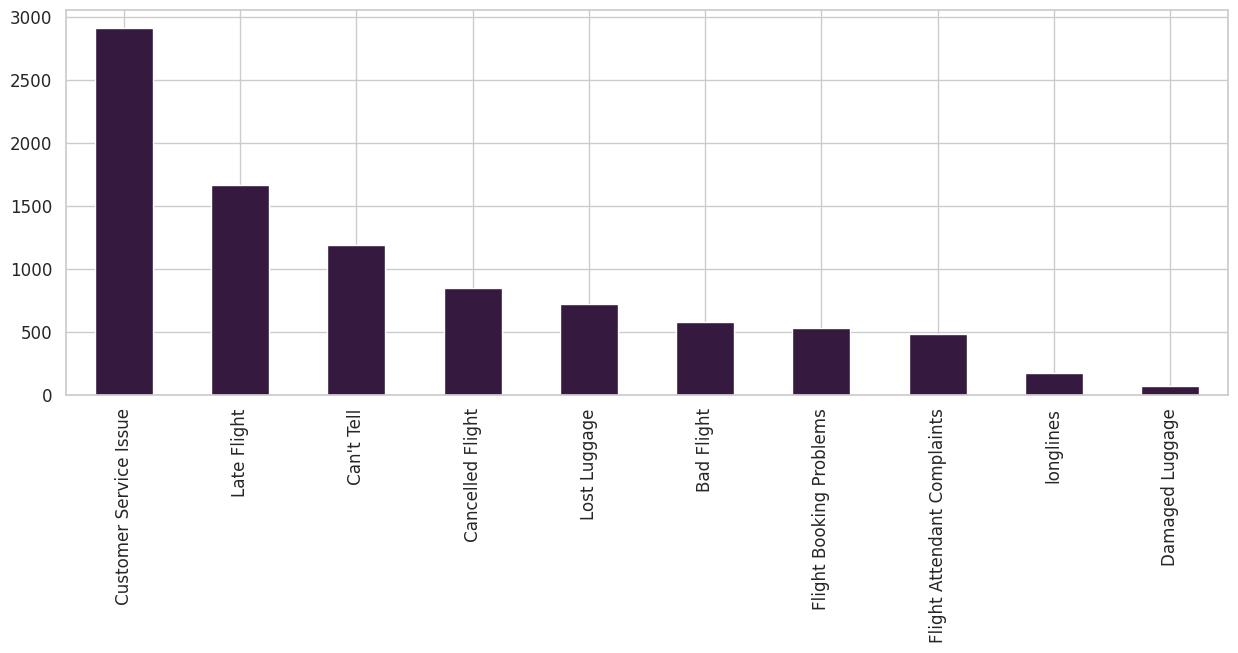

In [ ]:
df_cleaned.negativereason.value_counts().plot(kind='bar', figsize=(15,5), cmap=cmap)

Text(0.5, 0, 'Negative Reason')

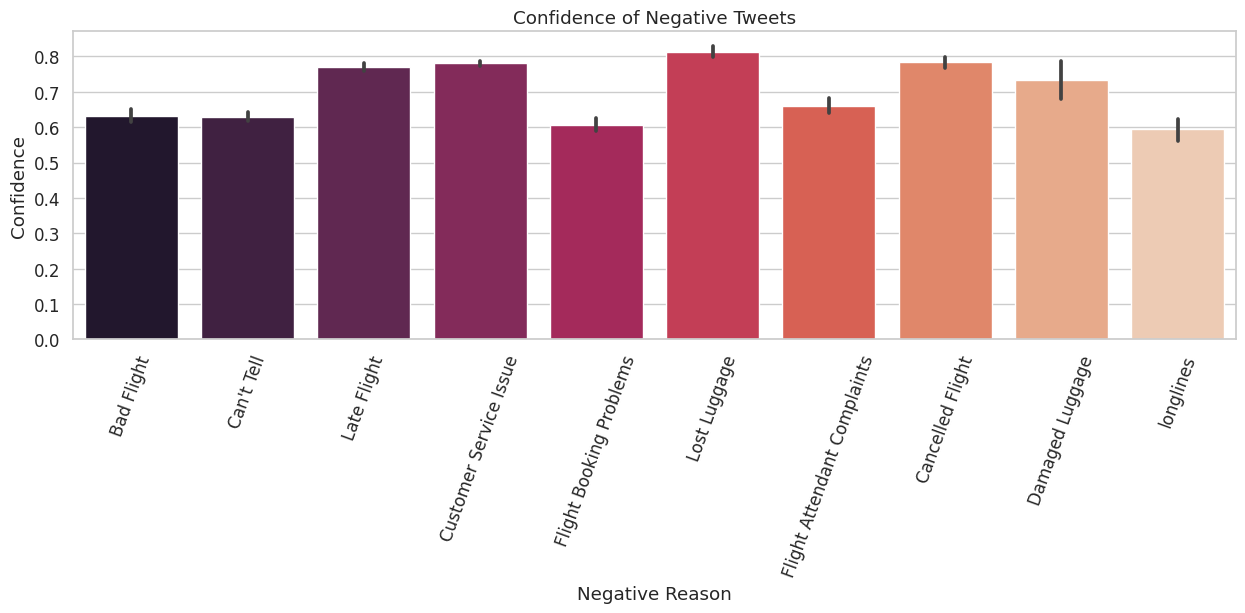

In [ ]:
plt.figure(figsize=(15, 4))
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")
ax = sns.barplot(x="negativereason", y="negativereason_confidence", data=df_cleaned, palette = 'rocket')
plt.xticks(rotation=70)
plt.title('Confidence of Negative Tweets')
plt.ylabel("Confidence")
plt.xlabel("Negative Reason")

Vader Sentiment Scoring Model

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
res = {}
for i, row in tqdm(df_cleaned.iterrows(), total=len(df_cleaned)):
    text = row['remaining_sentence']
    myid = row['tweet_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/14640 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'tweet_id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders

,tweet_id,neg,neu,pos,compound,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,...,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,first_word,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,0.000,1.000,0.000,0.0000,neutral,1.0000,NaN,neutral,NaN,...,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),@VirginAmerica,What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,0.000,1.000,0.000,0.0000,positive,0.3486,NaN,negative,0.0000,...,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),@VirginAmerica,plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000
2,570301083672812992,0.000,1.000,0.000,0.0000,neutral,0.6837,NaN,neutral,NaN,...,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),@VirginAmerica,I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000
3,570301031407624000,0.259,0.741,0.000,-0.5984,negative,1.0000,Bad Flight,negative,0.7033,...,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306
4,570300817074462016,0.351,0.649,0.000,-0.5829,negative,1.0000,Can't Tell,negative,1.0000,...,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),@VirginAmerica,and it's a really big bad thing about it,really big bad thing,-0.5829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,0.000,0.762,0.238,0.3612,positive,0.3487,NaN,NaN,0.0000,...,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01,NaN,NaN,@AmericanAir,thank you we got on a different flight to Chicago.,thank got different flight chicago,0.3612
14636,569587371693355008,0.296,0.704,0.000,-0.7906,negative,1.0000,Customer Service Issue,NaN,1.0000,...,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46,Texas,NaN,@AmericanAir,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc,-0.7184
14637,569587242672398016,0.000,0.685,0.315,0.3182,neutral,1.0000,NaN,NaN,NaN,...,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,@AmericanAir,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182
14638,569587188687633984,0.000,0.860,0.140,0.5027,negative,1.0000,Customer Service Issue,NaN,0.6659,...,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),@AmericanAir,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment,0.3818


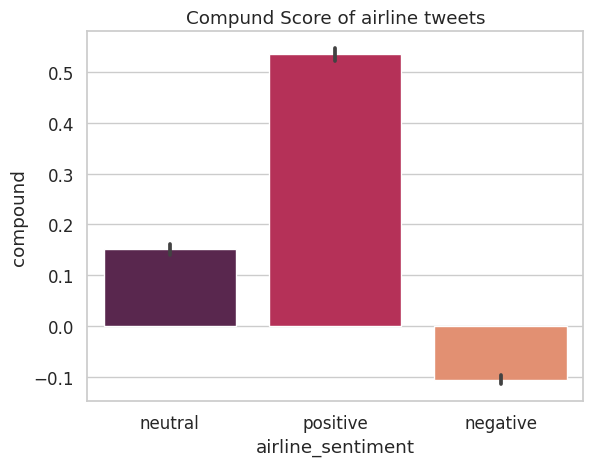

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(data=vaders, x='airline_sentiment', y='compound', palette = 'rocket')
ax.set_title('Compund Score of airline tweets')
plt.show()

Roberta Pretrained Model

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
df_cleaned

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000
2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000
3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306
4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,positive,0.3487,NaN,NaN,0.0000,American,KristenReenders,0,NaN,2015-02-22 12:01:01,NaN,NaN,thank you we got on a different flight to Chicago.,thank got different flight chicago,0.3612
14636,569587371693355008,negative,1.0000,Customer Service Issue,NaN,1.0000,American,itsropes,0,NaN,2015-02-22 11:59:46,Texas,NaN,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc,-0.7184
14637,569587242672398016,neutral,1.0000,NaN,NaN,NaN,American,sanyabun,0,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182
14638,569587188687633984,negative,1.0000,Customer Service Issue,NaN,0.6659,American,SraJackson,0,NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment,0.3818


In [ ]:
res = {}
for i, row in tqdm(df_cleaned.iterrows(), total=len(df_cleaned)):
    try:
        text = row['remaining_sentence']
        myid = row['tweet_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/14640 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'tweet_id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df

,tweet_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,airline_sentiment_confidence,...,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,first_word,remaining_sentence,cleaned_tweets,sentiment_score
0,570306133677760000,0.000,1.000,0.000,0.0000,0.168816,0.765447,0.065738,neutral,1.0000,...,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),@VirginAmerica,What @dhepburn said.,dhepburn said,0.0000
1,570301130888121984,0.000,1.000,0.000,0.0000,0.826406,0.155831,0.017763,positive,0.3486,...,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),@VirginAmerica,plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000
2,570301083672812992,0.000,1.000,0.000,0.0000,0.238275,0.596375,0.165350,neutral,0.6837,...,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),@VirginAmerica,I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000
3,570301031407624000,0.259,0.741,0.000,-0.5984,0.913923,0.080124,0.005953,negative,1.0000,...,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),@VirginAmerica,"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306
4,570300817074462016,0.351,0.649,0.000,-0.5829,0.883746,0.102645,0.013609,negative,1.0000,...,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),@VirginAmerica,and it's a really big bad thing about it,really big bad thing,-0.5829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825024,0.000,0.762,0.238,0.3612,0.020063,0.433166,0.546771,positive,0.3487,...,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01,NaN,NaN,@AmericanAir,thank you we got on a different flight to Chic...,thank got different flight chicago,0.3612
14636,569587371693355008,0.296,0.704,0.000,-0.7906,0.925297,0.067782,0.006922,negative,1.0000,...,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46,Texas,NaN,@AmericanAir,leaving over 20 minutes Late Flight. No warnin...,leaving minute late flight warning communicati...,-0.7184
14637,569587242672398016,0.000,0.685,0.315,0.3182,0.028567,0.699599,0.271834,neutral,1.0000,...,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,@AmericanAir,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182
14638,569587188687633984,0.000,0.860,0.140,0.5027,0.496855,0.448531,0.054614,negative,1.0000,...,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),@AmericanAir,"you have my money, you change my flight, and d...",money change flight dont answer phone suggesti...,0.3818


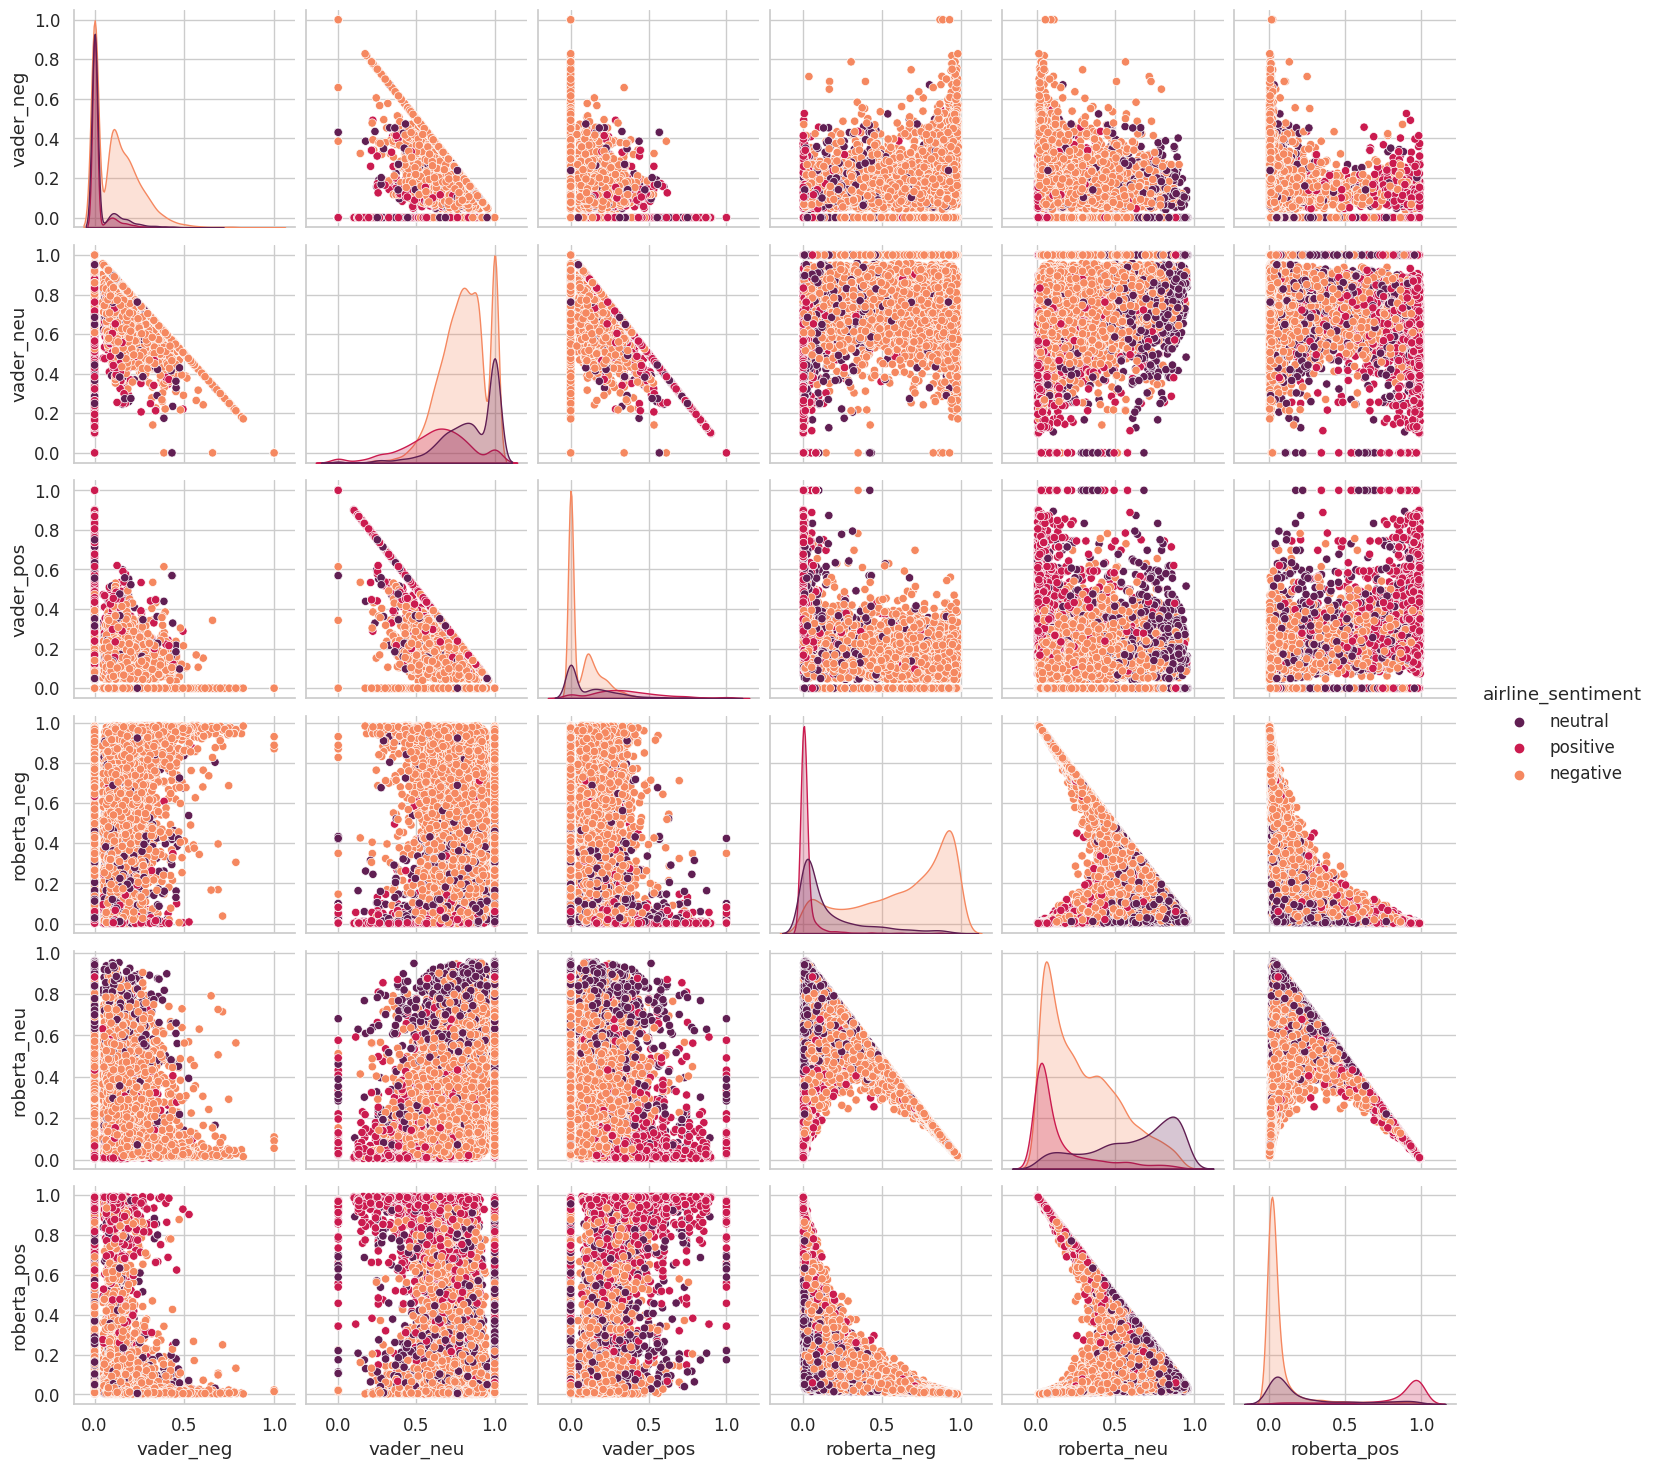

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='airline_sentiment',
            palette='rocket')
plt.show()

In [ ]:
results_df.to_excel("df_results_df_ver1.xlsx")

In [ ]:
pip install nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

file = files.upload()
data = pd.read_excel('df_results_df_ver1.xlsx')

Saving df_results_df_ver1.xlsx to df_results_df_ver1 (1).xlsx


In [ ]:
# Initialize sentiment analysis models
analyzer = SentimentIntensityAnalyzer()
roberta_sentiment = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
# Remove rows with missing values in the 'remaining_sentence' column
data = data.dropna(subset=['remaining_sentence'])

# Calculate VADER sentiment scores
data["vader_score"] = data["remaining_sentence"].apply(lambda x: analyzer.polarity_scores(x)["compound"])


In [ ]:
# Initialize RoBERTa sentiment analysis pipeline
roberta_sentiment = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Calculate RoBERTa sentiment scores
roberta_scores = roberta_sentiment(data["remaining_sentence"].tolist())
data["roberta_score"] = [score["label"] for score in roberta_scores]

# Display the updated dataset with the new "roberta_score" column
print(data.head())

   Unnamed: 0            tweet_id  vader_neg  vader_neu  vader_pos  \
0  0           570306133677760000  0.000      1.000      0.0         
1  1           570301130888121984  0.000      1.000      0.0         
2  2           570301083672812992  0.000      1.000      0.0         
3  3           570301031407624000  0.259      0.741      0.0         
4  4           570300817074462016  0.351      0.649      0.0         

   vader_compound  roberta_neg  roberta_neu  roberta_pos airline_sentiment  \
0  0.0000          0.168816     0.765447     0.065738     neutral            
1  0.0000          0.826406     0.155831     0.017763     positive           
2  0.0000          0.238275     0.596375     0.165350     neutral            
3 -0.5984          0.913923     0.080124     0.005953     negative           
4 -0.5829          0.883746     0.102645     0.013609     negative           

   ...  tweet_coord       tweet_created tweet_location  \
0  ...  NaN         2015-02-24 11:35:52  NaN        

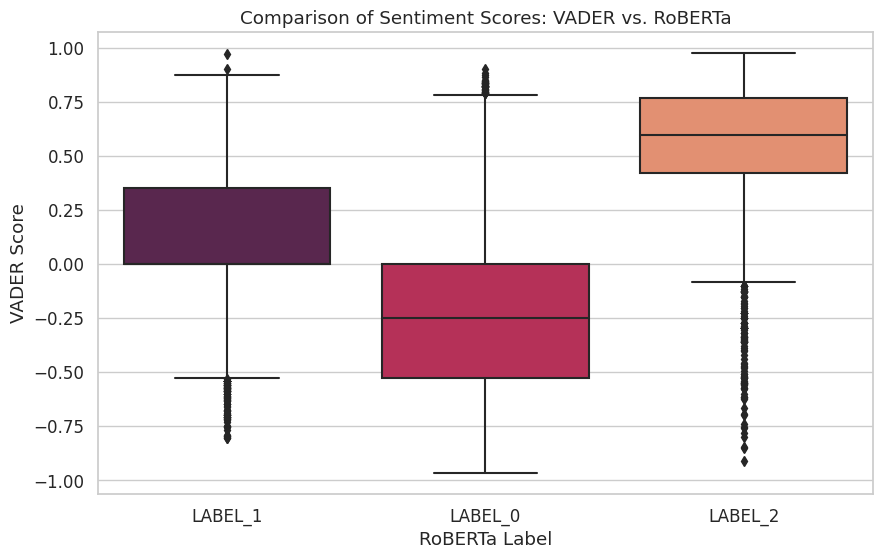

In [ ]:
# Compare sentiment scores between VADER and RoBERTa
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="roberta_score", y="vader_score", palette="rocket")
plt.title("Comparison of Sentiment Scores: VADER vs. RoBERTa")
plt.xlabel("RoBERTa Label")
plt.ylabel("VADER Score")
plt.show()

In [ ]:
data

,Unnamed: 0,tweet_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,...,tweet_coord,tweet_created,tweet_location,user_timezone,first_word,remaining_sentence,cleaned_tweets,sentiment_score,vader_score,roberta_score
0,0,570306133677760000,0.000,1.000,0.000,0.0000,0.168816,0.765447,0.065738,neutral,...,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),@VirginAmerica,What @dhepburn said.,dhepburn said,0.0000,0.0000,LABEL_1
1,1,570301130888121984,0.000,1.000,0.000,0.0000,0.826406,0.155831,0.017763,positive,...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),@VirginAmerica,plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky,0.0000,0.0000,LABEL_0
2,2,570301083672812992,0.000,1.000,0.000,0.0000,0.238275,0.596375,0.165350,neutral,...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),@VirginAmerica,I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip,0.0000,0.0000,LABEL_1
3,3,570301031407624000,0.259,0.741,0.000,-0.5984,0.913923,0.080124,0.005953,negative,...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse,-0.3306,-0.5984,LABEL_0
4,4,570300817074462016,0.351,0.649,0.000,-0.5829,0.883746,0.102645,0.013609,negative,...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),@VirginAmerica,and it's a really big bad thing about it,really big bad thing,-0.5829,-0.5829,LABEL_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,569587686496825024,0.000,0.762,0.238,0.3612,0.020063,0.433166,0.546771,positive,...,NaN,2015-02-22 12:01:01,NaN,NaN,@AmericanAir,thank you we got on a different flight to Chicago.,thank got different flight chicago,0.3612,0.3612,LABEL_2
14636,14636,569587371693355008,0.296,0.704,0.000,-0.7906,0.925297,0.067782,0.006922,negative,...,NaN,2015-02-22 11:59:46,Texas,NaN,@AmericanAir,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc,-0.7184,-0.7906,LABEL_0
14637,14637,569587242672398016,0.000,0.685,0.315,0.3182,0.028567,0.699599,0.271834,neutral,...,NaN,2015-02-22 11:59:15,"Nigeria,lagos",NaN,@AmericanAir,Please bring American Airlines to #BlackBerry10,please bring american airline blackberry,0.3182,0.3182,LABEL_1
14638,14638,569587188687633984,0.000,0.860,0.140,0.5027,0.496855,0.448531,0.054614,negative,...,NaN,2015-02-22 11:59:02,New Jersey,Eastern Time (US & Canada),@AmericanAir,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment,0.3818,0.5027,LABEL_0


In [ ]:
def label_vader_sentiment(vader_score):
    if vader_score > 0.05:
        return "positive"
    elif vader_score < -0.05:
        return "negative"
    else:
        return "neutral"

data["vader_label"] = data["vader_score"].apply(label_vader_sentiment)

In [ ]:
def label_roberta_sentiment(roberta_score):
    if roberta_score == 'LABEL_2':
        return "positive"
    elif roberta_score == 'LABEL_0':
        return "negative"
    else:
        return "neutral"

data["roberta_label"] = data["roberta_score"].apply(label_roberta_sentiment)

In [ ]:
data.to_excel("df_final_roberta_vader.xlsx")

In [ ]:
file = files.upload()
result_data = pd.read_excel('df_final_roberta_vader.xlsx')


Saving df_final_roberta_vader.xlsx to df_final_roberta_vader (1).xlsx


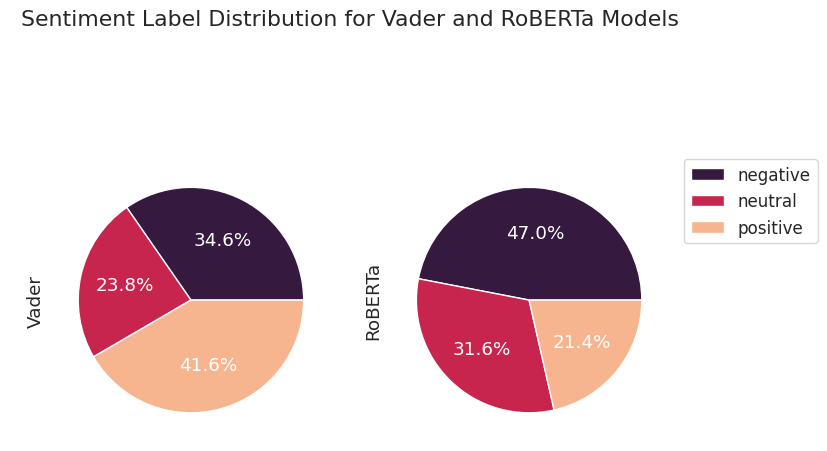

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the dataset loaded into a DataFrame called 'data'
# You can replace 'data' with the actual variable name

# Count the occurrences of each sentiment label for both models
vader_counts = result_data['vader_label'].value_counts()
roberta_counts = result_data['roberta_label'].value_counts()

# Create a DataFrame to store the counts
labels_df = pd.DataFrame({'Vader': vader_counts, 'RoBERTa': roberta_counts})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
labels_df.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=ax,legend=False, cmap=cmap, textprops={'color':"w"},title ='Sentiment Label Distribution for Vader and RoBERTa Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
result_data.dropna(subset=["ground_truth_sentiment"], inplace=True)

In [ ]:
result_data

,Unnamed: 0.1,Unnamed: 0,tweet_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,...,user_timezone,first_word,remaining_sentence,cleaned_tweets,sentiment_score,vader_score,roberta_score,vader_label,roberta_label,ground_truth_sentiment
0,0,0,570306133677760000,0.000,1.000,0.000,0.0000,0.168816,0.765447,0.065738,...,Eastern Time (US & Canada),@VirginAmerica,What @dhepburn said.,dhepburn said,0.0000,0.0000,LABEL_1,neutral,neutral,neutral
1,1,1,570301130888121984,0.000,1.000,0.000,0.0000,0.826406,0.155831,0.017763,...,Pacific Time (US & Canada),@VirginAmerica,plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000,0.0000,LABEL_0,neutral,negative,negative
2,2,2,570301083672812992,0.000,1.000,0.000,0.0000,0.238275,0.596375,0.165350,...,Central Time (US & Canada),@VirginAmerica,I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000,0.0000,LABEL_1,neutral,neutral,neutral
3,3,3,570301031407624000,0.259,0.741,0.000,-0.5984,0.913923,0.080124,0.005953,...,Pacific Time (US & Canada),@VirginAmerica,"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306,-0.5984,LABEL_0,negative,negative,negative
4,4,4,570300817074462016,0.351,0.649,0.000,-0.5829,0.883746,0.102645,0.013609,...,Pacific Time (US & Canada),@VirginAmerica,and it's a really big bad thing about it,really big bad thing,-0.5829,-0.5829,LABEL_0,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,5509,5509,568934745909828992,0.000,1.000,0.000,0.0000,0.963661,0.031545,0.004794,...,Quito,@SouthwestAir,@dultch97 kid just wants fucking money #scumbag,dultch kid want fucking money scumbag,-0.6344,0.0000,LABEL_0,neutral,negative,negative
5510,5510,5510,568932070447139968,0.000,0.771,0.229,0.5951,0.429307,0.298422,0.272271,...,Arizona,@SouthwestAir,I wish i would've seen this 4 hours ago!!! I W...,wish wouldve seen hour ago wanted see tonight ...,-0.5994,0.5951,LABEL_0,positive,negative,neutral
5511,5511,5511,568929816797323008,0.000,0.580,0.420,0.4404,0.035827,0.296837,0.667336,...,NaN,@SouthwestAir,just do it that easy,easy,0.4404,0.4404,LABEL_2,positive,positive,neutral
5512,5512,5512,568929782286515968,0.255,0.745,0.000,-0.3382,0.004178,0.282598,0.713225,...,NaN,@SouthwestAir,I'll have to drop by next time I visit!,ill drop next time visit,-0.5994,-0.3382,LABEL_2,negative,positive,positive


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

vader_true_labels = result_data['ground_truth_sentiment']
vader_pred_labels = result_data['vader_label']

roberta_true_labels = result_data['ground_truth_sentiment']
roberta_pred_labels = result_data['roberta_label']

# Calculate metrics for Vader
vader_accuracy = accuracy_score(vader_true_labels, vader_pred_labels)
vader_classification_report = classification_report(vader_true_labels, vader_pred_labels)

# Calculate metrics for RoBERTa
roberta_accuracy = accuracy_score(roberta_true_labels, roberta_pred_labels)
roberta_classification_report = classification_report(roberta_true_labels, roberta_pred_labels)

print("Vader Model Metrics:")
print("Accuracy:", vader_accuracy)
print("Classification Report:\n", vader_classification_report)

print("\nRoBERTa Model Metrics:")
print("Accuracy:", roberta_accuracy)
print("Classification Report:\n", roberta_classification_report)

Vader Model Metrics:
Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.49      0.63      2349
     neutral       0.43      0.43      0.43       941
    positive       0.34      0.84      0.48       710

    accuracy                           0.54      4000
   macro avg       0.55      0.59      0.52      4000
weighted avg       0.68      0.54      0.56      4000


RoBERTa Model Metrics:
Accuracy: 0.73125
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.70      0.80      2349
     neutral       0.50      0.68      0.58       941
    positive       0.67      0.89      0.76       710

    accuracy                           0.73      4000
   macro avg       0.70      0.76      0.71      4000
weighted avg       0.78      0.73      0.74      4000



The Transformer pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

Comparison of LR, Multinomial, Decision tree, KNN & Random Forest using TF - IDF

In [ ]:
train_df, test_df = train_test_split(df_cleaned, test_size=0.3, random_state=1)

In [ ]:
train_tweets =[]
for tweet in train_df.cleaned_tweets:
    train_tweets.append(tweet)

test_tweets =[]
for tweet in test_df.cleaned_tweets:
    test_tweets.append(tweet)

In [ ]:
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)


import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names_out())
print(train_tfidf)

       _defcon_  _emmaclifford  _robprice  a_life_story_   aa  aaadvantage  \
0           0.0            0.0        0.0            0.0  0.0          0.0   
1           0.0            0.0        0.0            0.0  0.0          0.0   
2           0.0            0.0        0.0            0.0  0.0          0.0   
3           0.0            0.0        0.0            0.0  0.0          0.0   
4           0.0            0.0        0.0            0.0  0.0          0.0   
...         ...            ...        ...            ...  ...          ...   
10243       0.0            0.0        0.0            0.0  0.0          0.0   
10244       0.0            0.0        0.0            0.0  0.0          0.0   
10245       0.0            0.0        0.0            0.0  0.0          0.0   
10246       0.0            0.0        0.0            0.0  0.0          0.0   
10247       0.0            0.0        0.0            0.0  0.0          0.0   

       aaba  aacom  aacustomerservice  aadavantage  ...  ðÿž  ð

In [ ]:
print(vectorizer.get_feature_names_out())

['_defcon_' '_emmaclifford' '_robprice' ... 'ðÿƒðÿ_xd_' 'ðÿƒðÿƒðÿƒ' 'ðÿˆ']


In [ ]:
cls = [LogisticRegression(),
       MultinomialNB(),
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [ ]:
lbl_actual = test_df.airline_sentiment
i = 0
accuracy = []
f1 = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.airline_sentiment)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 77.98%
              precision    recall  f1-score   support

    negative       0.94      0.79      0.86      3255
     neutral       0.46      0.69      0.55       625
    positive       0.58      0.81      0.68       512

    accuracy                           0.78      4392
   macro avg       0.66      0.77      0.70      4392
weighted avg       0.83      0.78      0.79      4392

MultinomialNB  Accuracy Score : 68.19%
              precision    recall  f1-score   support

    negative       0.99      0.67      0.80      4064
     neutral       0.14      0.76      0.23       171
    positive       0.19      0.88      0.32       157

    accuracy                           0.68      4392
   macro avg       0.44      0.77      0.45      4392
weighted avg       0.93      0.68      0.76      4392

DecisionTreeClassifier  Accuracy Score : 70.51%
              precision    recall  f1-score   support

    negative       0.81      0.80      0.81      278

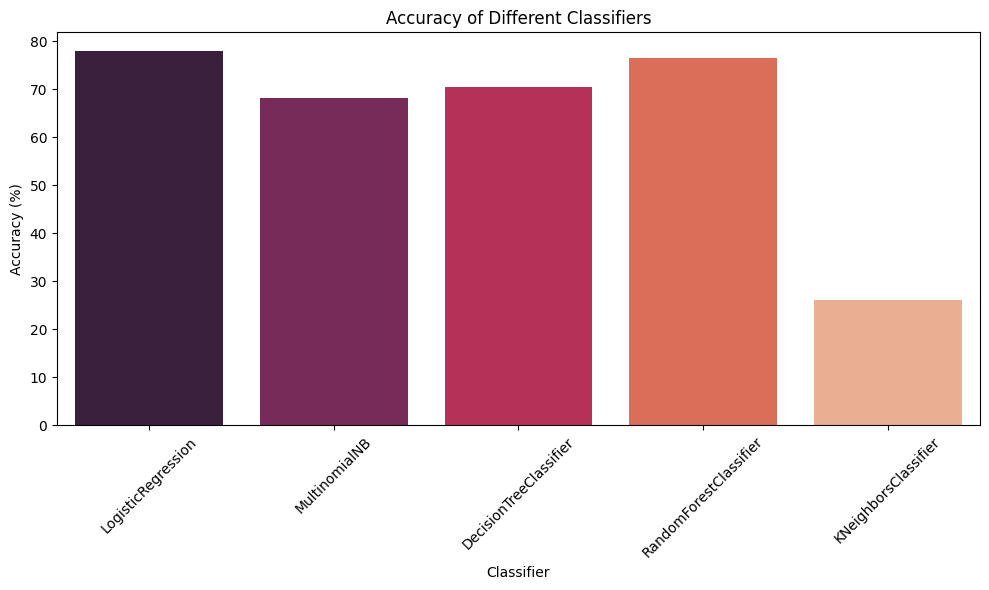

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cls_name, y=accuracy, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Different Classifiers")
plt.tight_layout()
plt.show()

In [ ]:

regressors = [LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(n_estimators=200)]

regressor_names = []

mae_scores = []
ae_scores = []
rmse_scores = []

for regressor in regressors:
    model = regressor.fit(train_tfidf_model, train_df.sentiment_score)
    predictions = model.predict(test_tfidf_model)

    mae = mean_absolute_error(predictions, test_df.sentiment_score)
    ae = sum(abs(predictions - test_df.sentiment_score)) / len(test_df)
    rmse = mean_squared_error(predictions, test_df.sentiment_score, squared=False)

    mae_scores.append(mae)
    ae_scores.append(ae)
    rmse_scores.append(rmse)

    regressor_names.append(regressor.__class__.__name__)

    print("{} Metrics:".format(regressor.__class__.__name__))
    print("MAE: {:.2f}".format(mae))
    print("AE: {:.2f}".format(ae))
    print("RMSE: {:.2f}".format(rmse))
    print("=" * 50)

plt.figure(figsize=(10, 6))
plt.bar(regressor_names, mae_scores, label="MAE")
plt.bar(regressor_names, ae_scores, label="AE")
plt.bar(regressor_names, rmse_scores, label="RMSE")
plt.xlabel("Regressor")
plt.ylabel("Metric Value")
plt.title("Regression Model Evaluation Metrics")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: ignored